In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Data description available here: https://gallery.azure.ai/Experiment/Predictive-Maintenance-Step-1-of-3-data-preparation-and-feature-engineering-2

In [2]:
train = pd.read_csv('../data/raw/PM_train.csv')
print('shape: ', train.shape)
print('columns', train.columns)

shape:  (20631, 26)
columns Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')


In [3]:
train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [4]:
test = pd.read_csv('../data/raw/PM_test.csv')
print('shape: ', test.shape)
print('columns', test.columns)

shape:  (13096, 26)
columns Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')


In [5]:
test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130


In [6]:
score = pd.read_csv('../data/raw/PM_score.csv')
print('shape: ', score.shape)
print('columns', score.columns)

shape:  (175, 26)
columns Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')


In [7]:
score.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,2,1,-0.0009,0.0004,100,518.67,642.66,1589.30,1407.16,14.62,...,521.62,2388.14,8129.59,8.4283,0.03,392,2388,100,39.00,23.3923
1,2,2,-0.0011,0.0002,100,518.67,642.51,1588.43,1405.47,14.62,...,522.02,2388.08,8120.05,8.4414,0.03,393,2388,100,38.84,23.2902
2,2,3,0.0002,0.0003,100,518.67,642.58,1595.60,1410.86,14.62,...,521.29,2388.08,8126.75,8.3804,0.03,394,2388,100,39.02,23.4064
3,2,4,0.0025,0.0001,100,518.67,642.31,1583.43,1408.23,14.62,...,521.57,2388.06,8129.91,8.4342,0.03,393,2388,100,38.82,23.4699
4,2,5,0.0004,-0.0004,100,518.67,642.77,1585.03,1407.60,14.62,...,521.59,2388.11,8127.01,8.4247,0.03,392,2388,100,38.81,23.3895


In [8]:
truth = pd.read_csv('../data/raw/PM_truth.csv')
print('shape: ', truth.shape)
print('columns', truth.columns)

shape:  (100, 1)
columns Index(['RUL'], dtype='object')


In [9]:
truth.head()

,RUL
0,112
1,98
2,69
3,82
4,91


### Data Labeling

In [10]:
# Calculate Remaining Useful Life (RUL)
train['RUL'] = train.apply(lambda row: train[train['id'] == row['id']]['cycle'].max() - row['cycle'], axis=1)
test['RUL'] = test.apply(lambda row: test[test['id'] == row['id']]['cycle'].max() - row['cycle'], axis=1)

In [11]:
# Business parameters
w0 = 7
w1 = 14

# Calculate if engine will fail within [0, w1] days
train['label1'] = train['RUL'].apply(lambda x: 0 if x > w1 else 1)
test['label1'] = test['RUL'].apply(lambda x: 0 if x > w1 else 1)

# Calculate if engine will fail within [0, w0], [w0+1, w1] days
train['label2'] = train['RUL'].apply(lambda x: 2 if x <= w0 else (0 if x > w1 else 1))
test['label2'] = test['RUL'].apply(lambda x: 2 if x <= w0 else (0 if x > w1 else 1))

In [12]:
train[174:195]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2
174,1,175,0.0001,0.0002,100,518.67,643.61,1603.29,1422.52,14.62,...,8.4890,0.03,394,2388,100,38.58,23.1573,17.0,0,0
175,1,176,-0.0020,-0.0003,100,518.67,642.86,1592.27,1422.73,14.62,...,8.4853,0.03,394,2388,100,38.72,23.2491,16.0,0,0
176,1,177,-0.0038,-0.0003,100,518.67,643.79,1602.02,1423.99,14.62,...,8.4779,0.03,396,2388,100,38.63,23.1673,15.0,0,0
177,1,178,-0.0001,0.0002,100,518.67,643.38,1605.33,1424.65,14.62,...,8.4770,0.03,395,2388,100,38.65,23.1770,14.0,1,1
178,1,179,0.0023,-0.0003,100,518.67,642.86,1592.56,1429.45,14.62,...,8.4947,0.03,395,2388,100,38.77,23.1888,13.0,1,1
179,1,180,-0.0024,0.0000,100,518.67,643.58,1599.87,1417.14,14.62,...,8.4737,0.03,395,2388,100,38.86,23.0070,12.0,1,1
180,1,181,-0.0006,0.0005,100,518.67,643.44,1596.71,1420.64,14.62,...,8.4720,0.03,397,2388,100,38.34,23.1652,11.0,1,1
181,1,182,-0.0010,0.0003,100,518.67,644.21,1602.08,1426.62,14.62,...,8.5158,0.03,397,2388,100,38.43,23.1787,10.0,1,1
182,1,183,0.0001,0.0001,100,518.67,643.24,1597.23,1419.03,14.62,...,8.5041,0.03,396,2388,100,38.56,23.1302,9.0,1,1
183,1,184,0.0004,0.0003,100,518.67,644.07,1605.44,1432.52,14.62,...,8.5133,0.03,395,2388,100,38.43,23.0146,8.0,1,1


### Quick Data Analysis

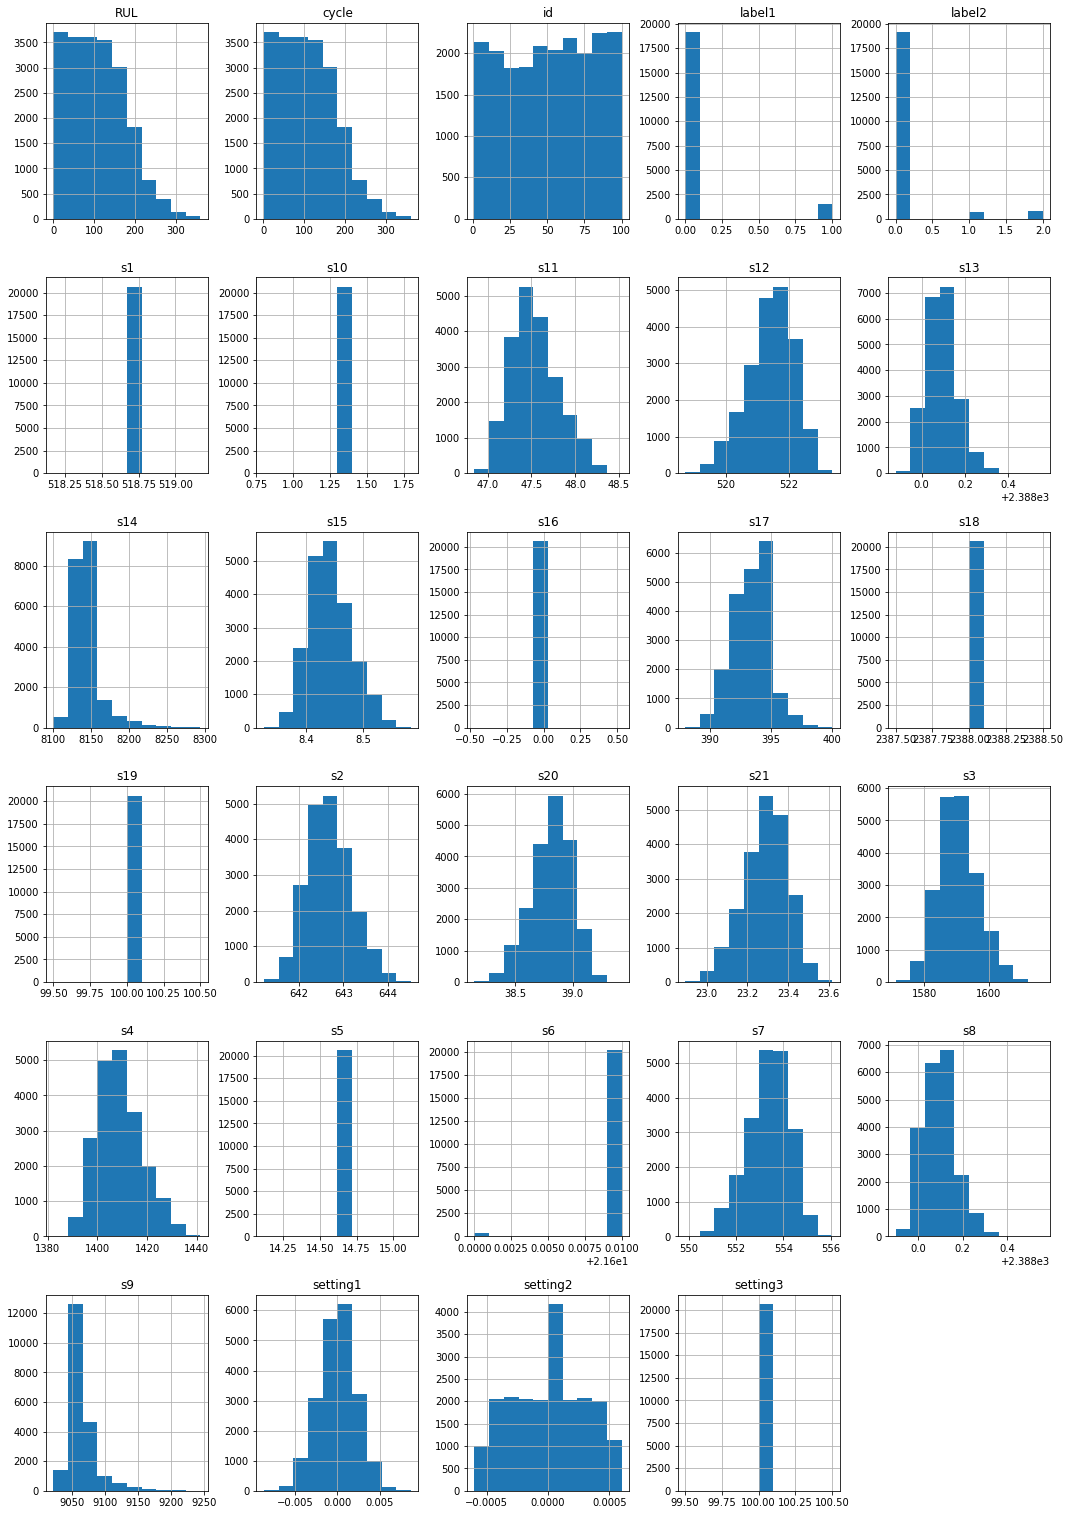

In [13]:
train.hist(figsize=(18,27));

In [14]:
train_description = train.describe()
train_description

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.072706,0.111483
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.259660,0.420257
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000,2.000000


In [15]:
train_cols = train_description.loc['std', :] == 0
train_cols = list(train_description.loc['std', train_cols].index)
print("Train dataset. Columns with invariant values:", train_cols)

Train dataset. Columns with invariant values: ['setting3', 's18', 's19']


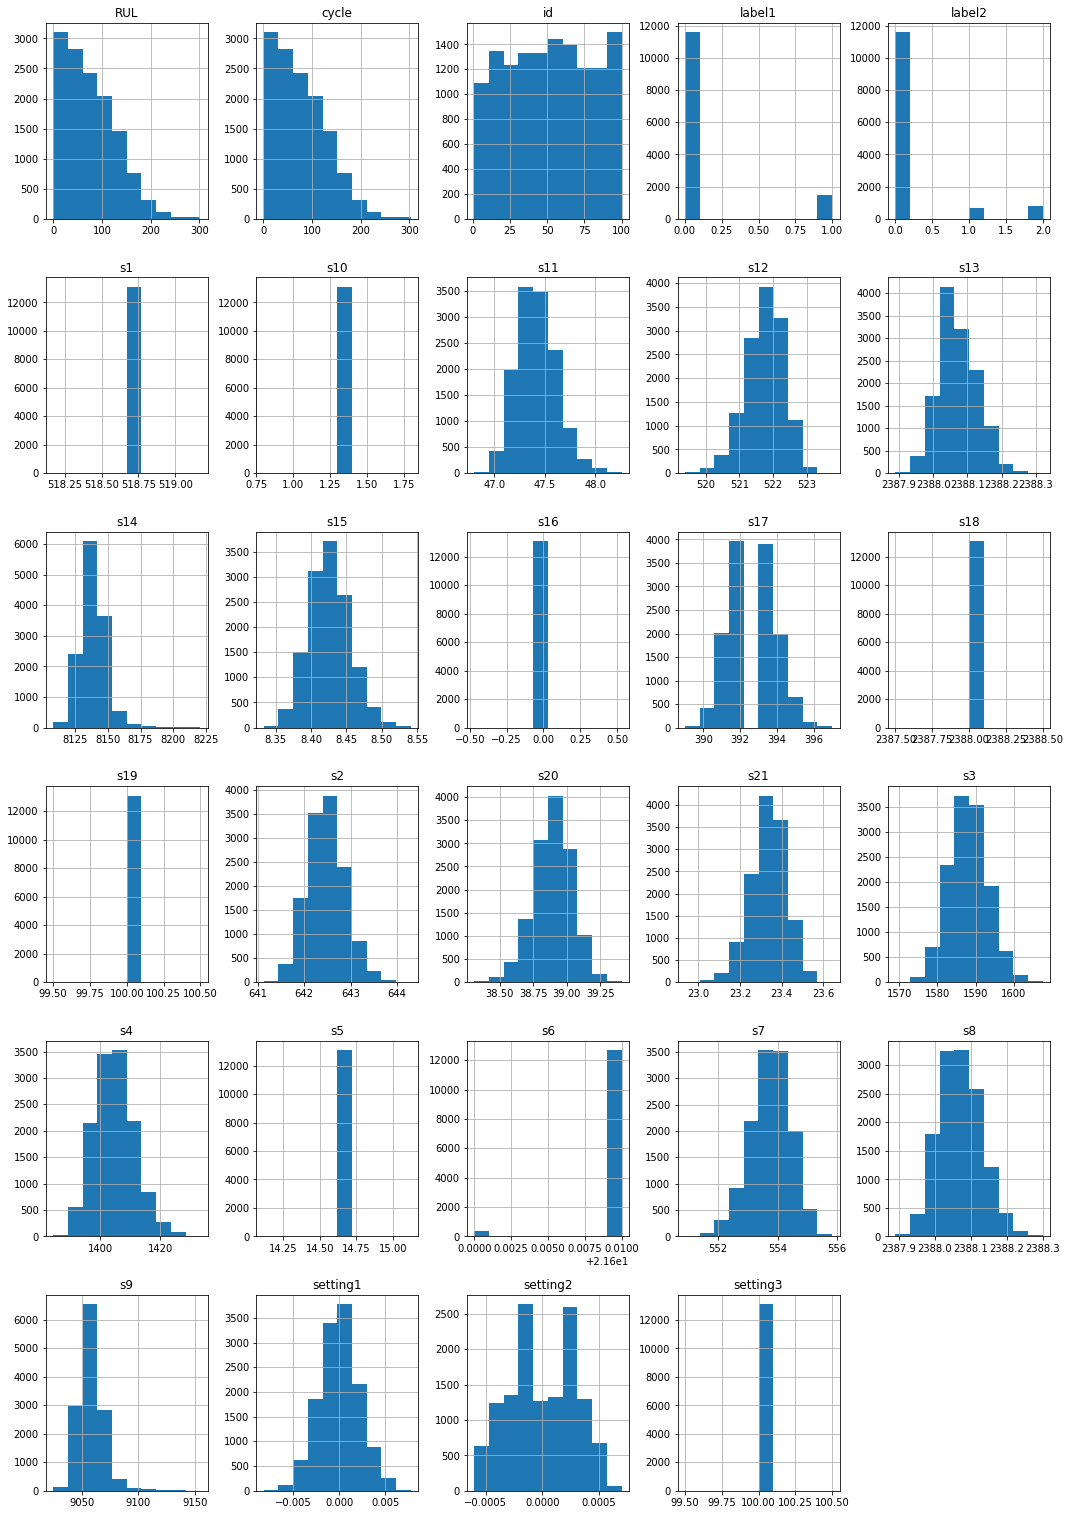

In [16]:
test.hist(figsize=(18,27));

In [17]:
test_description = test.describe()
test_description

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,75.836515,0.114539,0.175626
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120,53.057749,0.318477,0.516698
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,0.000000,0.000000,0.000000
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,32.000000,0.000000,0.000000
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,68.000000,0.000000,0.000000
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,112.000000,0.000000,0.000000
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,302.000000,1.000000,2.000000


In [18]:
test_cols = test_description.loc['std', :] == 0
test_cols = list(test_description.loc['std', test_cols].index)
print("Test dataset. Columns with invariant values:", test_cols)

Test dataset. Columns with invariant values: ['setting3', 's18', 's19']


In [19]:
common_invariant_columns = list(set(train_cols).intersection(test_cols))
if (len(common_invariant_columns) > 0):
    print('Dropping common columns with invariant values: ', common_invariant_columns)
    train.drop(common_invariant_columns, axis='columns', inplace=True)    
    test.drop(common_invariant_columns, axis='columns', inplace=True)

Dropping common columns with invariant values:  ['setting3', 's18', 's19']


In [20]:
train.columns

Index(['id', 'cycle', 'setting1', 'setting2', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's20', 's21', 'RUL', 'label1', 'label2'],
      dtype='object')

In [21]:
test.columns

Index(['id', 'cycle', 'setting1', 'setting2', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's20', 's21', 'RUL', 'label1', 'label2'],
      dtype='object')

### Feature Engineering

In [22]:
def create_avg_and_std_features(df, columns, window_size):
    for orig_colname in columns:
        # define names for new columns
        colname_avg = 'avg_' + orig_colname
        colname_std = 'std_' + orig_colname
        # create columns in dataset 
        df[colname_avg] = np.NaN
        df[colname_std] = np.NaN       
        # set values for each engine id
        for id in train['id'].unique():
            idx = train['id'] == id
            df.loc[idx, [colname_avg]] = df.loc[idx, [orig_colname]].rolling(window_size, min_periods=1).sum().values
            df.loc[idx, [colname_std]] = df.loc[idx, [orig_colname]].rolling(window_size, min_periods=1).std().values       
        # fix NaN for first row for each engine
        df[colname_std].bfill(inplace=True)

In [23]:
window_size = 5
columns = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 
           's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 
           's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

# remove from list all columns that were already dropped
columns = list(set(columns) - set(common_invariant_columns))

create_avg_and_std_features(train, columns, window_size)
create_avg_and_std_features(test, columns, window_size)

In [24]:
train[:200]

,id,cycle,setting1,setting2,s1,s2,s3,s4,s5,s6,...,avg_s15,std_s15,avg_setting1,std_setting1,avg_s7,std_s7,avg_s20,std_s20,avg_s1,std_s1
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,8.4195,0.008697,-0.0007,0.001838,554.36,0.431335,39.06,0.042426,518.67,0.0
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,16.8513,0.008697,0.0012,0.001838,1108.11,0.431335,78.06,0.042426,1037.34,0.0
2,1,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,...,25.2691,0.007640,-0.0031,0.003113,1662.37,0.327159,117.01,0.055076,1556.01,0.0
3,1,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,...,33.6373,0.028117,-0.0024,0.002686,2216.82,0.313103,155.89,0.076322,2074.68,0.0
4,1,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,...,42.0667,0.025953,-0.0043,0.002397,2770.82,0.286234,194.79,0.073621,2593.35,0.0
5,1,6,-0.0043,-0.0001,518.67,642.10,1584.47,1398.37,14.62,21.61,...,42.0580,0.025727,-0.0079,0.002838,2771.13,0.362671,194.71,0.051186,2593.35,0.0
6,1,7,0.0010,0.0001,518.67,642.48,1592.32,1397.77,14.62,21.61,...,42.0236,0.023476,-0.0088,0.002578,2771.72,0.246435,194.81,0.086718,2593.35,0.0
7,1,8,-0.0034,0.0003,518.67,642.56,1582.96,1400.97,14.62,21.61,...,42.0134,0.022477,-0.0079,0.002381,2771.31,0.334021,194.83,0.086487,2593.35,0.0
8,1,9,0.0008,0.0001,518.67,642.12,1590.98,1394.80,14.62,21.61,...,42.0180,0.020740,-0.0078,0.002405,2770.55,0.394525,195.00,0.077136,2593.35,0.0
9,1,10,-0.0033,0.0001,518.67,641.71,1591.24,1400.46,14.62,21.61,...,42.0172,0.020493,-0.0092,0.002532,2770.14,0.460239,195.05,0.062849,2593.35,0.0


In [25]:
train.columns

Index(['id', 'cycle', 'setting1', 'setting2', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's20', 's21', 'RUL', 'label1', 'label2', 'avg_s4', 'std_s4',
       'avg_s12', 'std_s12', 'avg_s8', 'std_s8', 'avg_s5', 'std_s5', 'avg_s16',
       'std_s16', 'avg_s21', 'std_s21', 'avg_s6', 'std_s6', 'avg_s10',
       'std_s10', 'avg_s13', 'std_s13', 'avg_s2', 'std_s2', 'avg_s14',
       'std_s14', 'avg_setting2', 'std_setting2', 'avg_s9', 'std_s9', 'avg_s3',
       'std_s3', 'avg_s17', 'std_s17', 'avg_s11', 'std_s11', 'avg_s15',
       'std_s15', 'avg_setting1', 'std_setting1', 'avg_s7', 'std_s7',
       'avg_s20', 'std_s20', 'avg_s1', 'std_s1'],
      dtype='object')

In [26]:
test[:35]

,id,cycle,setting1,setting2,s1,s2,s3,s4,s5,s6,...,avg_s15,std_s15,avg_setting1,std_setting1,avg_s7,std_s7,avg_s20,std_s20,avg_s1,std_s1
0,1,1,0.0023,0.0003,518.67,643.02,1585.29,1398.21,14.62,21.61,...,8.4052,0.017607,0.0023,0.003536,553.90,0.671751,38.86,0.113137,518.67,0.0
1,1,2,-0.0027,-0.0003,518.67,641.71,1588.45,1395.42,14.62,21.61,...,16.7855,0.017607,-0.0004,0.003536,1108.75,0.671751,77.88,0.113137,1037.34,0.0
2,1,3,0.0003,0.0001,518.67,642.46,1586.94,1401.34,14.62,21.61,...,25.2296,0.032155,-0.0001,0.002517,1662.86,0.499032,116.96,0.113725,1556.01,0.0
3,1,4,0.0042,0.0000,518.67,642.44,1584.12,1406.42,14.62,21.61,...,33.6213,0.027781,0.0041,0.002950,2216.93,0.421614,155.96,0.093095,2074.68,0.0
4,1,5,0.0014,0.0000,518.67,642.51,1587.19,1401.92,14.62,21.61,...,42.0244,0.024080,0.0055,0.002560,2771.09,0.366565,194.95,0.080623,2593.35,0.0
5,1,6,0.0012,0.0003,518.67,642.11,1579.12,1395.13,14.62,21.61,...,42.0430,0.025534,0.0044,0.002477,2771.41,0.322444,195.00,0.061237,2593.35,0.0
6,1,7,0.0000,0.0002,518.67,642.11,1583.34,1404.84,14.62,21.61,...,42.0541,0.022794,0.0071,0.001662,2770.45,0.125100,194.83,0.088487,2593.35,0.0
7,1,8,0.0006,0.0000,518.67,642.54,1580.89,1400.89,14.62,21.61,...,42.0313,0.015626,0.0074,0.001616,2769.93,0.254028,194.80,0.079373,2593.35,0.0
8,1,9,-0.0036,0.0000,518.67,641.88,1593.29,1412.28,14.62,21.61,...,42.0749,0.017520,-0.0004,0.002043,2770.35,0.342710,194.90,0.101489,2593.35,0.0
9,1,10,-0.0025,-0.0001,518.67,642.07,1585.25,1398.64,14.62,21.61,...,42.0811,0.016668,-0.0043,0.002080,2770.47,0.354584,194.78,0.112161,2593.35,0.0


In [27]:
test.columns

Index(['id', 'cycle', 'setting1', 'setting2', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's20', 's21', 'RUL', 'label1', 'label2', 'avg_s4', 'std_s4',
       'avg_s12', 'std_s12', 'avg_s8', 'std_s8', 'avg_s5', 'std_s5', 'avg_s16',
       'std_s16', 'avg_s21', 'std_s21', 'avg_s6', 'std_s6', 'avg_s10',
       'std_s10', 'avg_s13', 'std_s13', 'avg_s2', 'std_s2', 'avg_s14',
       'std_s14', 'avg_setting2', 'std_setting2', 'avg_s9', 'std_s9', 'avg_s3',
       'std_s3', 'avg_s17', 'std_s17', 'avg_s11', 'std_s11', 'avg_s15',
       'std_s15', 'avg_setting1', 'std_setting1', 'avg_s7', 'std_s7',
       'avg_s20', 'std_s20', 'avg_s1', 'std_s1'],
      dtype='object')

In [32]:
train.to_csv('../data/processed/train.csv', index=False)
test.to_csv('../data/processed/test.csv', index=False)

In [29]:
# add new column and set values
truth['id'] = truth.index + 1

# rearrange columns
truth = truth[['id', 'RUL']]

In [33]:
truth.to_csv('../data/processed/test_real_RUL.csv', index=False)